In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 23 00:12:59 2021

@author: steve
"""

import numpy as np
import math
import random
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D  # 蝜芾ˊ3D摨扳���遆撘�

In [2]:
# function sinx+2y^2
def f2(p):
    n = len(p)
    y = [[] * 1 for i in range(0, len(p))]
    for j in range(0, n):
        y[j] = math.sin(p[j, 0]) + math.pow(2 * p[j, 1], 2)
    y = np.asarray(y)
    return y

In [3]:
# plot result function
def plot_Result(real_in, real_out, simulate_out, state_string):
    rmse = np.sqrt((np.square(real_out - simulate_out)).mean());
    r = round(np.corrcoef((real_out, simulate_out))[0, 0], 3)
    plot.figure(0)
    plot.plot(real_out, 'b', linewidth=2)
    plot.plot(simulate_out, 'r', linewidth=1)
    plot.title('%s RMSE=%s' % (state_string, rmse))
    plot.legend(['target output', 'model output'], loc="upper right")
    plot.show()
    plot.clf()
    plot.figure(1)
    plot.scatter(real_out, simulate_out)
    plot.title('%s Regression R2=%s' % (state_string, r))
    plot.show()
    plot.clf()
    fig3 = plot.figure(2)
    ax = Axes3D(fig3)
    ax.scatter(real_in[:, 0], real_in[:, 1], np.expand_dims(real_out, axis=1), 'bo')
    ax.scatter(real_in[:, 0], real_in[:, 1], np.expand_dims(simulate_out, axis=1), 'rx')
    plot.title('%s RMSE=%s' % (state_string, rmse))
    ax.set_xlabel("x");
    ax.set_ylabel("y");
    ax.set_zlabel("f(x,y)")
    plot.show()
    plot.clf()
    return rmse, r

In [4]:
# %%
data_in = np.asarray([[random.random() * 9 + 1 for j in range(0, 2)] for i in range(500)])
data_real_out = f2(data_in)

# %%
# 閮梶毀嚗屸�霅㚁�皜祈岫鞈��蝝Ｗ��潸身摰�
train_index = [i for i in range(0, 300)]
val_index = [i for i in range(300, 401)]
test_index = [i for i in range(401, 500)]

# %%
# 鞈��甇����
data_in_max = (data_in[train_index, :]).max(axis=0)
data_in_min = (data_in[train_index, :]).min(axis=0)
data_in_Norm = (data_in - data_in_min) / (data_in_max - data_in_min);
data_real_out_max = (data_real_out[train_index]).max(axis=0)
data_real_out_min = (data_real_out[train_index]).min(axis=0)
data_real_out_Norm = (data_real_out - data_real_out_min) / (data_real_out_max - data_real_out_min)

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import adam_v2

epochs = 50

model = Sequential()
model.add(Dense(36))
model.add(Activation('relu'))
model.add(Dense(1))

learning_rate = 0.01
adam = adam_v2.Adam(learning_rate=learning_rate)

model.compile(loss='mse',
              optimizer=adam)

history = model.fit(data_in_Norm, data_real_out_Norm,
                    epochs=epochs,
                    verbose=0,
                    shuffle=True,
                    validation_split=0.1)

# 蝬脰楝璅⊥挱頛詨枂��
data_out_Norm = model.predict(data_in_Norm);

# �齿迤閬誩�
data_out = np.squeeze(data_out_Norm * (data_real_out_max - data_real_out_min) + data_real_out_min)

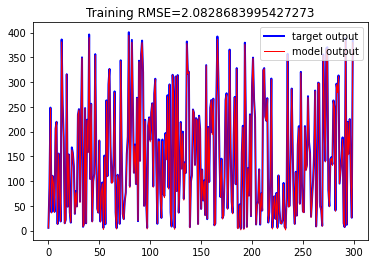

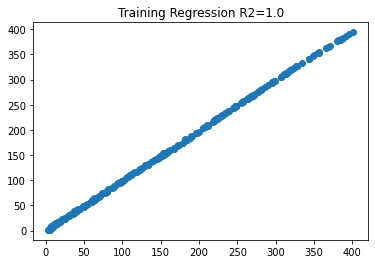

c:\users\woody\desktop\(mon_567)_artificial_neural_network\homework\venv\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


<Figure size 432x288 with 0 Axes>

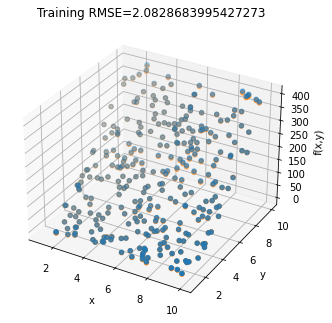

<Figure size 432x288 with 0 Axes>

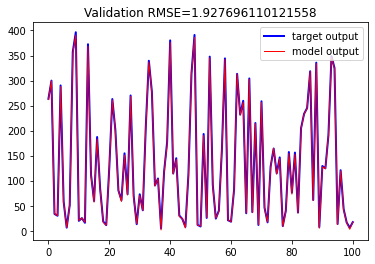

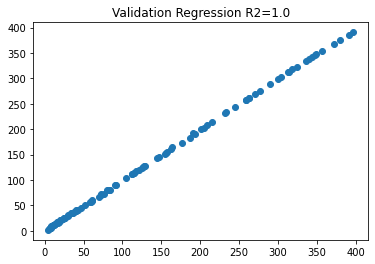

c:\users\woody\desktop\(mon_567)_artificial_neural_network\homework\venv\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


<Figure size 432x288 with 0 Axes>

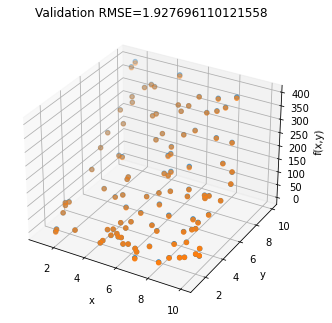

<Figure size 432x288 with 0 Axes>

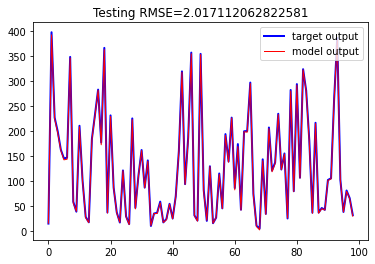

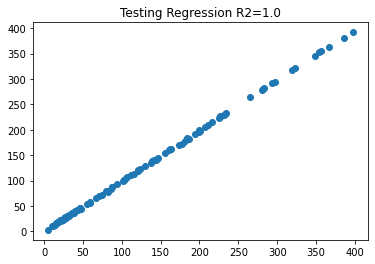

c:\users\woody\desktop\(mon_567)_artificial_neural_network\homework\venv\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


<Figure size 432x288 with 0 Axes>

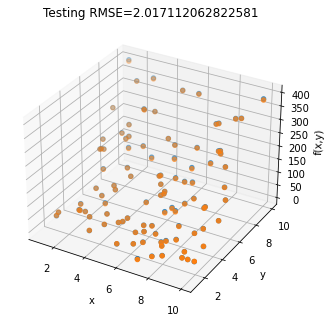

<Figure size 432x288 with 0 Axes>

In [6]:
# 閮梶毀鞈��蝜芸�
[train_rmse, train_R] = plot_Result(data_in[train_index], data_real_out[train_index], data_out[train_index], 'Training')
# 撽𡑒�鞈��蝜芸�
[val_rmse, val_R] = plot_Result(data_in[val_index], data_real_out[val_index], data_out[val_index], 'Validation')
# 皜祈岫鞈��蝜芸�
[test_rmse, test_R] = plot_Result(data_in[test_index], data_real_out[test_index], data_out[test_index], 'Testing')
